# Single Layer Neural Networks
Suppose we have a $
\text { vector of } p \text { variables } X=\left(X_{1}, X_{2}, \ldots, X_{p}\right)
$

The goal: build a nonlinear function $f(X)$ to predict the response $Y$. 

 
 


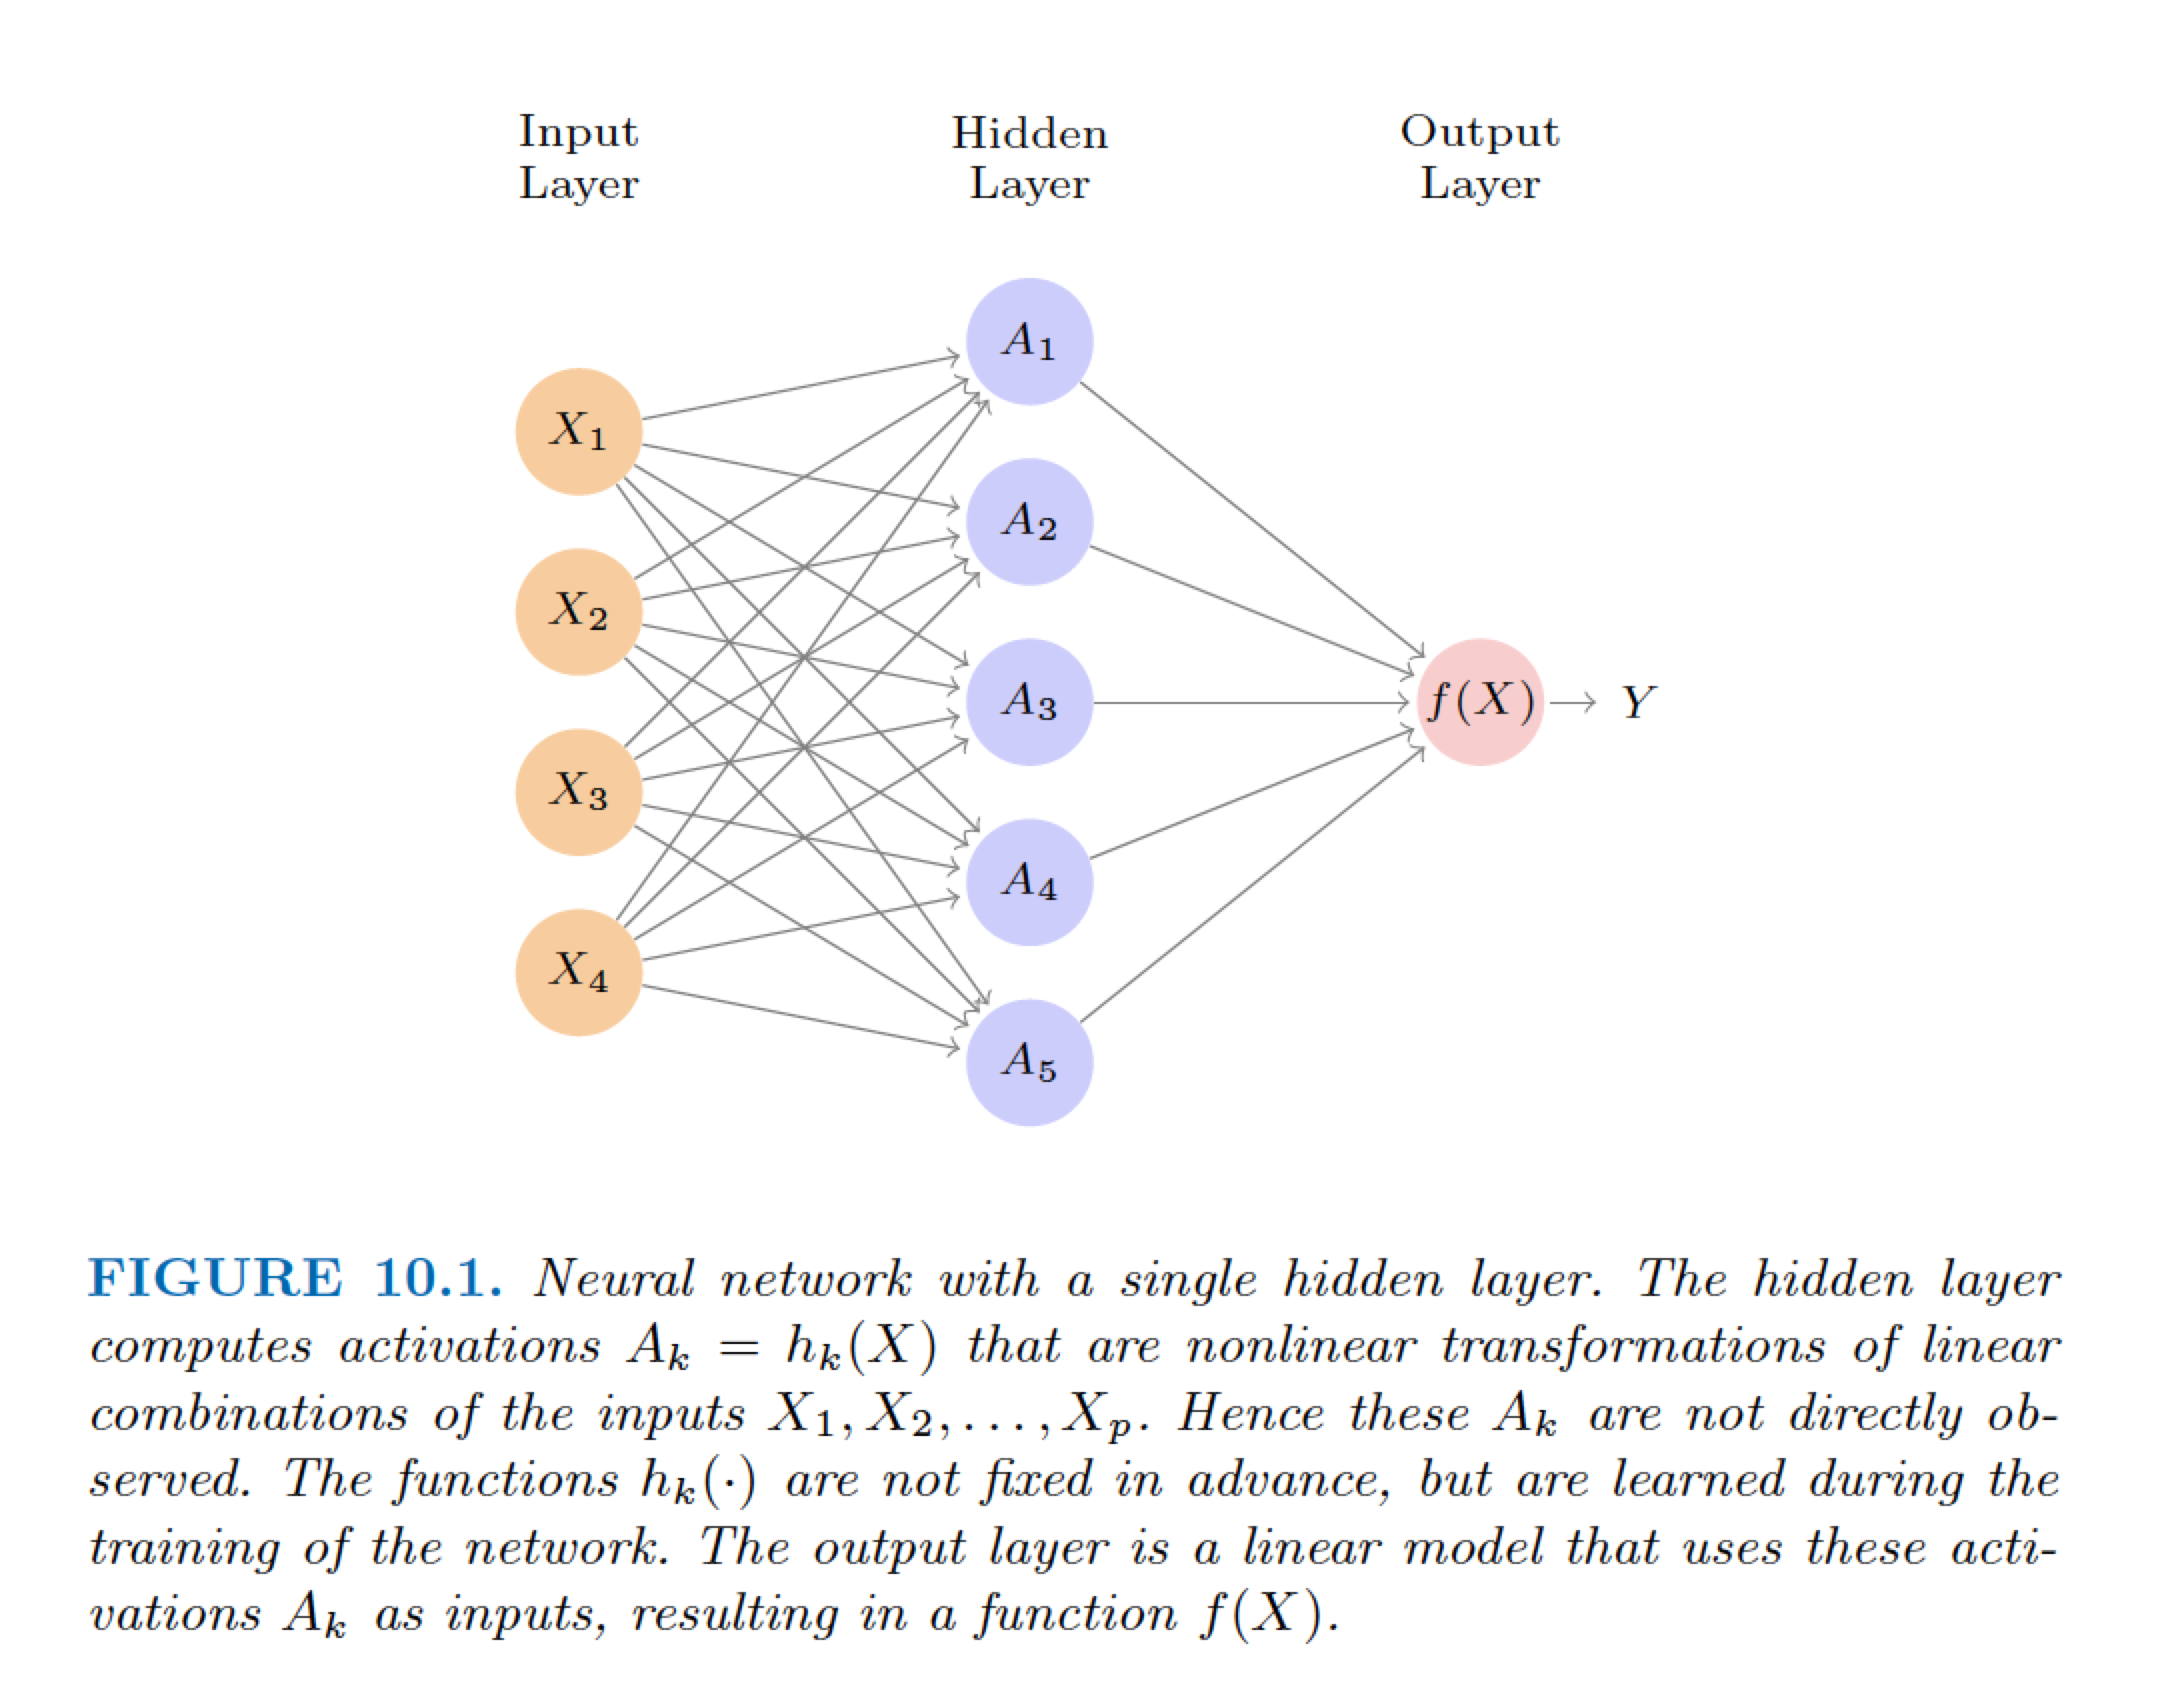


 
In the terminology of neural networks, the four features $X_{1}, \ldots, X_{4}$ make up the units in the input layer. The arrows indicate that each of the inputs from the input layer feeds into each of the $K$ hidden units (we get to pick $K$; here we chose 5 ). The neural network model has the form
$$
\begin{aligned}
f(X) &=\beta_{0}+\sum_{k=1}^{K} \beta_{k} h_{k}(X) \\
&=\beta_{0}+\sum_{k=1}^{K} \beta_{k} g\left(w_{k 0}+\sum_{j=1}^{p} w_{k j} X_{j}\right)
\end{aligned}
$$
It is built up here in two steps. First the $K$ activations $A_{k}, k=1, \ldots, K$, in the hidden layer are computed as functions of the input features $X_{1}, \ldots, X_{p}$,
$$
A_{k}=h_{k}(X)=g\left(w_{k 0}+\sum_{j=1}^{p} w_{k j} X_{j}\right),
$$
where $g(z)$ is a nonlinear activation function that is specified in advance. We can think of each $A_{k}$ as a different transformation $h_{k}(X)$ of the original features, much like the basis functions of Chapter 7 . These $K$ activations from the hidden layer then feed into the output layer, resulting in
$$
f(X)=\beta_{0}+\sum_{k=1}^{K} \beta_{k} A_{k},
$$



# Step-by-Step implementation of a single hidden layer neural network

- Specification: see class notes 

- Implementatation and simulation using two inputs, $X_1$, $X_2$
    

In [8]:
#### The simulation function
planar_dataset <- function(){
    set.seed(5)
    m <- 400
    N <- m/2
    D <- 2
    X <- matrix(0, nrow = m, ncol = D)
    Y <- matrix(0, nrow = m, ncol = 1)
    a <- 4
    
    for(j in 0:1){
      ix <- seq((N*j)+1, N*(j+1))
      t <- seq(j*3.12,(j+1)*3.12,length.out = N) + rnorm(N, sd = 0.2)
      r <- a*sin(4*t) + rnorm(N, sd = 0.2)
      X[ix,1] <- r*sin(t)
      X[ix,2] <- r*cos(t)
      Y[ix,] <- j
    }
    
    d <- as.data.frame(cbind(X, Y))
    names(d) <- c('X1','X2','Y')
    d
  }

# simulate the data and 
df <- planar_dataset()






,X1,X2,Y
,<dbl>,<dbl>,<dbl>
1,4.209741e-01,-2.47960544,0
2,1.045229e+00,3.47030503,0
3,6.283169e-01,-2.81317302,0
4,4.957169e-02,0.81079335,0
5,1.595915e+00,3.72267190,0
6,2.487093e-02,-0.58915359,0
7,-4.225533e-05,0.11642982,0
8,1.553542e-03,-0.08965886,0
9,6.858252e-02,1.00298104,0


[1] 200

,X1,X2,Y
,<dbl>,<dbl>,<dbl>
43,1.28254718,1.70979370,0
99,-1.07793558,-0.07647273,0
65,-0.77396751,-0.67798834,0
148,0.97812875,-0.80394481,0
240,-0.71900041,-0.86556001,1
78,-3.65778012,-1.29118485,0
396,0.03537309,0.71977650,1
318,-2.24084702,0.34788322,1
228,-0.24091428,-1.99514667,1


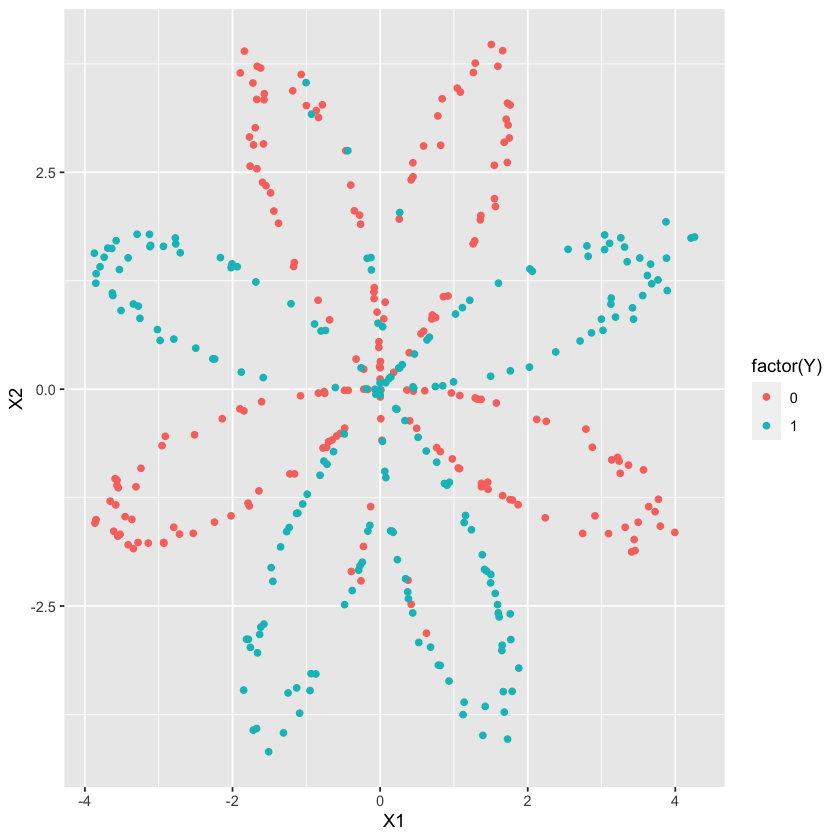

In [11]:
df<-df[sample(1:nrow(df)), ]

library(ggplot2)
ggplot(df, aes(x = X1, y = X2, color = factor(Y))) +
  geom_point()


head(df,10)

In [13]:
###build a test and training sample
train_test_split_index <- 0.8 * nrow(df)
train <- df[1:train_test_split_index,]
test <- df[(train_test_split_index+1): nrow(df),]


In [ ]:
###Standardize inputs: only standardize inputs, not outputs. 
X_train <- scale(train[, c(1:2)])

y_train <- train$y
dim(y_train) <- c(length(y_train), 1) # add extra dimension to vector

X_test <- scale(test[, c(1:2)])

y_test <- test$y
dim(y_test) <- c(length(y_test), 1) # add extra dimension to vector